In [15]:
import pandas as pd
import numpy as np
import math
from copy import deepcopy

DATA_PATH = "/Users/mvonebers/HUBBS-Lab/data/"
#DATA_PATH = "/home/maggie/HUBBS-Lab/data/"

e4_data = pd.read_excel(DATA_PATH + "E4_TEST.xlsx")
change_data = pd.read_excel(DATA_PATH + "normalized_change.xlsx")
audio_data = pd.read_excel(DATA_PATH + "audio_TEST copy.xlsx")

e4_data.insert(0, "person", [0] * e4_data.shape[0])
e4_data.insert(1, "trial", [0] * e4_data.shape[0])

for i, row in e4_data.iterrows():
    e4_data.at[i, "person"] = int(e4_data.at[i, "id"][7:])
    e4_data.at[i, "trial"] = int(e4_data.at[i, "id"][5])
    
e4_data = e4_data.drop(columns=['id'])
e4_data = e4_data.rename(columns={"person": "id"})

audio_data.insert(0, "person", [0] * audio_data.shape[0])
audio_data.insert(1, "trial", [0] * audio_data.shape[0])

for i, row in audio_data.iterrows():
    audio_data.at[i, "person"] = int(audio_data.at[i, "id"][7:])
    audio_data.at[i, "trial"] = int(audio_data.at[i, "id"][5])

audio_data = audio_data.drop(columns=['id'])
audio_data = audio_data.rename(columns={"person": "id"})

audio_data = audio_data[audio_data.id != 16]
audio_data = audio_data[audio_data.id != 38]
audio_data = audio_data[audio_data.id != 46]
audio_data = audio_data[audio_data.id != 53]
audio_data = audio_data[audio_data.id != 58]
audio_data = audio_data[audio_data.id != 65]

all_data = pd.merge(e4_data, change_data, on='id')
all_data = all_data[all_data.id != 66]

all_data = audio_data.merge(all_data, how='right')
all_data

id  trial  pcm_RMSenergy_sma_amean  pcm_fftMag_mfcc_sma[1]_amean  \
0     4      1                 0.007879                      0.956435   
1     4      2                 0.006843                     -0.399977   
2     4      3                 0.003532                      0.615522   
3     4      4                 0.004056                      0.912469   
4     4      5                 0.000788                     -1.409059   
..   ..    ...                      ...                           ...   
147  73      4                 0.016747                     -5.346863   
148  73      5                 0.019861                     -6.544580   
149  73      6                 0.023864                     -6.224142   
150  73      7                 0.019280                     -6.070041   
151  73      8                 0.018839                     -5.079182   

     pcm_fftMag_mfcc_sma[2]_amean  pcm_fftMag_mfcc_sma[3]_amean  \
0                      -13.176010                     -4.782369   
1                      -12.222920                     -8.252062   
2                       -9.837350                     -2.540836   
3                       -8.391797                     -7.296996   
4                       -1.801911                     -5.151633   
..                            ...                           ...   
147                     -4.401036                     -1.772596   
148                     -0.529959                     -4.315085   
149                     -1.605599                     -4.598936   
150                     -1.986066                     -4.606451   
151                     -1.334333                     -3.884128   

     pcm_fftMag_mfcc_sma[4]_amean  pcm_fftMag_mfcc_sma[5]_amean  \
0                       -5.508350                     -6.742012   
1                       -2.672821                     -3.437455   
2                       -2.281998                     -3.958653   
3                       -3.236593                     -1.216842   
4                       -2.803752                     -6.043437   
..                            ...                           ...   
147                     -6.538306                      5.228556   
148                     -7.491222                      9.523307   
149                     -8.447270                      9.679458   
150                     -5.151283                      6.730979   
151                     -7.937570                      9.279237   

     pcm_fftMag_mfcc_sma[6]_amean  pcm_fftMag_mfcc_sma[7]_amean  ...  \
0                      -13.622470                     -4.198480  ...   
1                      -14.641910                     -2.807243  ...   
2                      -14.158830                      1.465646  ...   
3                      -14.971950                     -1.150219  ...   
4                       -5.157262                     -2.180702  ...   
..                            ...                           ...  ...   
147                    -17.409770                     -3.816441  ...   
148                    -22.557560                     -2.752085  ...   
149                    -22.852170                     -0.745983  ...   
150                    -23.007390                     -1.617074  ...   
151                    -19.915600                     -4.012684  ...   

     EDA_FREQ_PPT  EDA_AMP_PPT  Brief fear of Negative Evaluation  \
0        7.181628     0.012059                           0.137931   
1        7.312119     0.012054                           0.137931   
2        7.685270     0.012726                           0.137931   
3        6.262231     0.010277                           0.137931   
4        2.574713     0.010306                           0.137931   
..            ...          ...                                ...   
147      8.862629     0.031206                           0.344828   
148     10.471204     0.026741                           0.344828   
149     15.984329     0.044909  

In [30]:
"""
Collect all manual manual_slopes (trial 8 - trial 1) / 8
"""

def get_manual(data, num_trials):
    man_slopes = pd.DataFrame(np.zeros((num_trials * 20, 42)), columns=data.columns)
    man_slopes = man_slopes.drop(["trial"], axis=1)

    first = [0] * 34
    for i in range(data.shape[0]):
        if data.iloc[i, 1] == 1:
            for j in range(2,34):
                first[j - 2] = data.iloc[i, j]
        elif data.iloc[i, 1] == num_trials:
            for j in range(2,34):
                man_slopes.iloc[i, 0] = data.iloc[i, 0]
                for k in range(33, 41): # for each of the survey columns
                    man_slopes.iloc[i, k] = data.iloc[i, k + 1]

                if not math.isnan(data.iloc[i, j]):
                    man_slopes.iloc[i, j - 1] = (data.iloc[i, j] - first[j - 2]) / num_trials
                elif not math.isnan(all_data.iloc[i, j-1]):
                    man_slopes.iloc[i, j - 1] = (data.iloc[i, j-1] - first[j - 2]) / num_trials
                elif not math.isnan(all_data.iloc[i, j-2]):
                    man_slopes.iloc[i, j - 1] = (data.iloc[i, j-2] - first[j - 2]) / num_trials
                else:
                    man_slopes.iloc[i, j - 1] = 0


    index_names = man_slopes[ man_slopes['id'] == 0 ].index
    man_slopes.drop(index_names, inplace=True)

    man_slopes.replace(0, np.NaN, inplace=True)
    return man_slopes
    
manual_slopes = get_manual(all_data, 8)
manual_slopes

IndexError: single positional indexer is out-of-bounds

In [34]:
"""
Get slopes from linear regression of the 8 trials for each ID
"""
# 20 participants in total
from sklearn.linear_model import LinearRegression

def get_slopes(data, num_trials):
    y0 = data['trial'].to_numpy(copy=True)

    slopes = pd.DataFrame(np.zeros((19, 42)), columns=data.columns)
    slopes = slopes.drop(["trial"], axis=1)

    for col in range(2, 34):
        x1 = data[data.columns[col]]
        y0 = list(range(1,num_trials + 1))
        for row in range(19):
            x0 = x1[(row * num_trials):(row * num_trials) + num_trials].to_numpy()
            x = np.array([])
            y = np.array([])
            
            slopes.iloc[row, 0] = data.iloc[row * num_trials, 0]

            for i in range(len(x0)):  # remove NaN from data
                if not math.isnan(x0[i]) and not math.isnan(y0[i]):
                    x = np.append(x, x0[i])
                    y = np.append(y, y0[i])

            try:
                reg = LinearRegression().fit(y.reshape(-1,1),x)
                slopes.iloc[row, col - 1] = reg.coef_
            except:
                 slopes.iloc[row, col - 1] = 0
    
    for col in range(34, 42):
        for row in range(19):
            slopes.iloc[row, col - 1] = data.iloc[row * num_trials, col]
                    
    slopes.replace(0, np.NaN, inplace=True)
    return slopes

all_slopes = get_slopes(all_data, 8)
all_slopes

id  pcm_RMSenergy_sma_amean  pcm_fftMag_mfcc_sma[1]_amean  \
0    4.0                -0.000864                     -1.188091   
1    5.0                -0.004605                      0.022244   
2    8.0                 0.001767                     -0.545172   
3   20.0                -0.003113                      0.120467   
4   21.0                -0.000428                     -0.201158   
5   23.0                -0.002165                     -0.024271   
6   32.0                -0.001112                      0.432318   
7   35.0                -0.003161                      0.366671   
8   37.0                -0.000485                      0.394130   
9   41.0                -0.000964                     -0.020902   
10  42.0                 0.000033                      0.030377   
11  44.0                 0.001722                     -0.155570   
12  47.0                -0.000957                      0.267696   
13  50.0                 0.000250                      0.118293   
14  51.0                -0.000146                      0.074970   
15  61.0                -0.000064                      0.242250   
16  62.0                 0.000513                      0.053834   
17  71.0                -0.001059                      0.243053   
18  73.0                -0.000180                     -0.181482   

    pcm_fftMag_mfcc_sma[2]_amean  pcm_fftMag_mfcc_sma[3]_amean  \
0                       1.458396                     -0.644213   
1                       0.041306                      0.371020   
2                      -0.233862                      0.693634   
3                      -0.326470                      0.884765   
4                      -0.268297                      0.201903   
5                       0.128524                      0.470709   
6                      -0.105907                      1.495445   
7                       0.193564                     -0.023716   
8                       0.261597                     -0.139036   
9                       0.018043                      0.745624   
10                     -0.063008                      0.135935   
11                     -0.558999                     -0.628423   
12                     -0.395647                     -0.071611   
13                     -0.035700                     -0.043826   
14                     -0.498040                      0.097378   
15                     -0.098755                     -0.078896   
16                      0.146335                      0.629590   
17                      0.031848                     -0.051682   
18                      0.348306                     -0.524237   

    pcm_fftMag_mfcc_sma[4]_amean  pcm_fftMag_mfcc_sma[5]_amean  \
0                      -0.697069                     -0.543809   
1                       1.856300                     -2.347585   
2                      -1.303848                     -0.635333   
3                      -0.090467                      0.182058   
4                      -0.366338                      0.377646   
5                       1.293796                     -1.696810   
6                      -1.006756                      1.001877   
7                       0.258827                      0.975375   
8                       0.246071                      0.183514   
9                       0.887429                     -3.439343   
10                     -0.160517                     -0.550089   
11                      0.435421                     -0.724745   
12                      0.458861                     -0.211226   
13                     -0.301693                     -0.097414   
14                      0.809618                     -0.370430   
15                     -0.244518                      0.649802   
16                     -1.159198                      0.128915   
17                      0.113995                     -0.224008   
18                      0.278079                      0.139213   

    pcm_fftMag_mfcc_sma

In [29]:
#from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from scipy.stats import pearsonr

y_columns = change_data.columns.to_list()[1:]

def get_combo_predictions(X0, slope_data):
    corrs = []
    ps = []
    for y_col, y_i in zip(y_columns, range(len(y_columns))):
        y0 = slope_data[y_col].to_numpy(copy=True)
        X = np.array([X0[0]])
        y = np.array(y0[0])
        
        for i in range(1,len(X0)):  # remove NaN from data
            is_nan = False
            for x in X0[i]:
                if math.isnan(x):
                    is_nan = True
                    break
            if not math.isnan(y0[i]) and not is_nan:
                X = np.append(X, [X0[i]], axis=0)
                y = np.append(y, y0[i])
            
        folds = min(10, len(X))
        model = LinearRegression()
        cv = KFold(folds, shuffle=True, random_state=42)
        predicted_vals0 = cross_val_predict(model, X, y, cv=cv)
        actual_vals0 = slope_data[y_col].to_numpy(copy=True)
        predicted_vals = []
        actual_vals = []
        

        for j in range(len(predicted_vals0)):
            if not math.isnan(predicted_vals0[j]) and not math.isnan(actual_vals0[j]):
                predicted_vals.append(predicted_vals0[j])
                actual_vals.append(actual_vals0[j])

        correlation, pval = pearsonr(predicted_vals, actual_vals)
        #to_print = str(correlation) + str(pval)
        #if pval < 0.15: 
        #    if not folds == 10:
        #        print("With # KFolds", folds)
        #    print("{0}:\t\t{1}\t\t{2}\t{3}\t\t{4}".format(y_col, correlation, pval, "Rows:", len(y)))
        corrs.append(correlation)
        ps.append(pval)
        
    return corrs, ps
      
def generate_combos(slope_data):
    group_c = []
    group_p = []
    group_titles = []

    group_titles.append('mfcc1-12')
    X0_mfcc = slope_data[slope_data.columns[2:14]].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_mfcc, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('pauses')
    X0_pauses = slope_data[slope_data.columns[17:20]].to_numpy(copy=True) # #pause, pause_frequency, pause_interval
    c, p = get_combo_predictions(X0_pauses, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('mfccs + pauses')
    columns = slope_data.columns[2:14].to_list() + slope_data.columns[17:20].to_list()
    X0_pauses = slope_data[columns].to_numpy(copy=True) # #pause, pause_frequency, pause_interval
    c, p = get_combo_predictions(X0_pauses, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('jitter, shimmer')
    X0_jitter = slope_data[slope_data.columns[22:24]].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_jitter, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('mfccs+ jitter, shimmer')
    columns = slope_data.columns[2:14].to_list() + slope_data.columns[22:24].to_list()
    X0_jitter = slope_data[columns].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_jitter, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append("all bio")
    X0_eda = slope_data[slope_data.columns[23:30]].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_eda, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('bio + mfcc')
    columns = slope_data.columns[2:14].to_list() + slope_data.columns[23:30].to_list()
    X0_bio_mfcc = slope_data[columns].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_bio_mfcc, slope_data)
    group_c.append(c)
    group_p.append(p)

    # All mfcc's combined with other attributes
    for i in range(14, 25):
        title = "mfccs + " + str(slope_data.columns[i])
        group_titles.append(title)
        columns = slope_data.columns[2:14].to_list() + [slope_data.columns[i]]
        X0 = slope_data[columns].to_numpy(copy=True)
        c,p = get_combo_predictions(X0, slope_data)
        group_c.append(c)
        group_p.append(p)

    for i in range(14, 25):
        col1 = slope_data.columns[i]
        for j in range(i + 1, 25):
            col2 = slope_data.columns[j]
            title = str(col1) + '+' + str(col2)
            group_titles.append(title)
            X0 = slope_data[[col1, col2]].to_numpy(copy=True)
            c, p = get_combo_predictions(X0, slope_data)
            group_c.append(c)
            group_p.append(p)

    for i in range(14, 25):
        col1 = slope_data.columns[i]
        for j in range(i + 1, 25):
            col2 = slope_data.columns[j]
            columns = slope_data.columns[2:14].to_list() + [col1] + [col2]
            title = "mfccs + " + str(col1) + '+' + str(col2)
            group_titles.append(title)
            X0 = slope_data[[col1, col2]].to_numpy(copy=True)
            c, p = get_combo_predictions(X0, slope_data)
            group_c.append(c)
            group_p.append(p)

    for i in range(14, 24):
        col = slope_data.columns[i]
        title = 'bio +' + str(col)
        group_titles.append(title)
        columns = slope_data.columns[23:30].to_list() + [col]
        X0_eda = slope_data[columns].to_numpy(copy=True)
        c,p = get_combo_predictions(X0_eda, slope_data)
        group_c.append(c)
        group_p.append(p)

    for i in range(14, 24):
        col = slope_data.columns[i]
        title = 'mfcc + bio +' + str(col)
        group_titles.append(title)
        columns = slope_data.columns[2:14].to_list() + slope_data.columns[23:30].to_list() + [col]
        X0_eda = slope_data[columns].to_numpy(copy=True)
        c,p = get_combo_predictions(X0_eda, slope_data)
        group_c.append(c)
        group_p.append(p)
        
    return group_c, group_p, group_titles

group_c, group_p, group_titles = generate_combos(all_slopes)

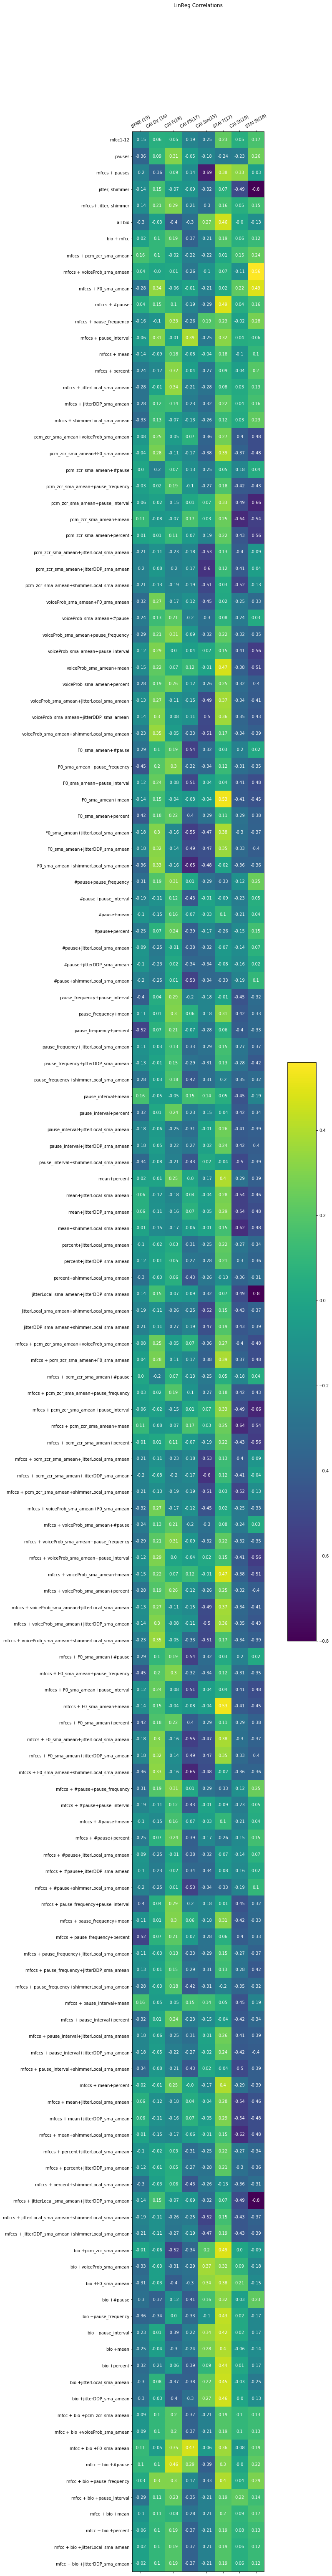

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

short_y_col = ["BFNE (19)", "CAI Dy (16)", "CAI F(18)", "CAI PS(17)", "CAI Sm(15)", "STAI T(17)", "CAI St(19)", "STAI St(18)"]
correlations = np.matrix(group_c)
pvalues = np.matrix(group_p)

correlations = np.round(correlations, decimals=2)
pvalues = np.round(pvalues, decimals=2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,85))

p = ax.matshow(correlations)
fig.colorbar(p, ax=ax, fraction=0.05, pad=0.04)
ax.set_xticklabels(labels=[''] + short_y_col)
ax.set_yticklabels(labels=group_titles)
plt.yticks(np.arange(0, len(group_titles), 1.0))
for tick in ax.get_xticklabels():
    tick.set_rotation(30)  
    
for i in range(len(short_y_col)):
    for j in range(len(group_titles)):
        text = ax.text(i, j, correlations[j, i], ha="center", va="center", color="w")
    
plt.title('LinReg Correlations')
fig.tight_layout()
plt.savefig(DATA_PATH + 'correlatons.png')
plt.show()

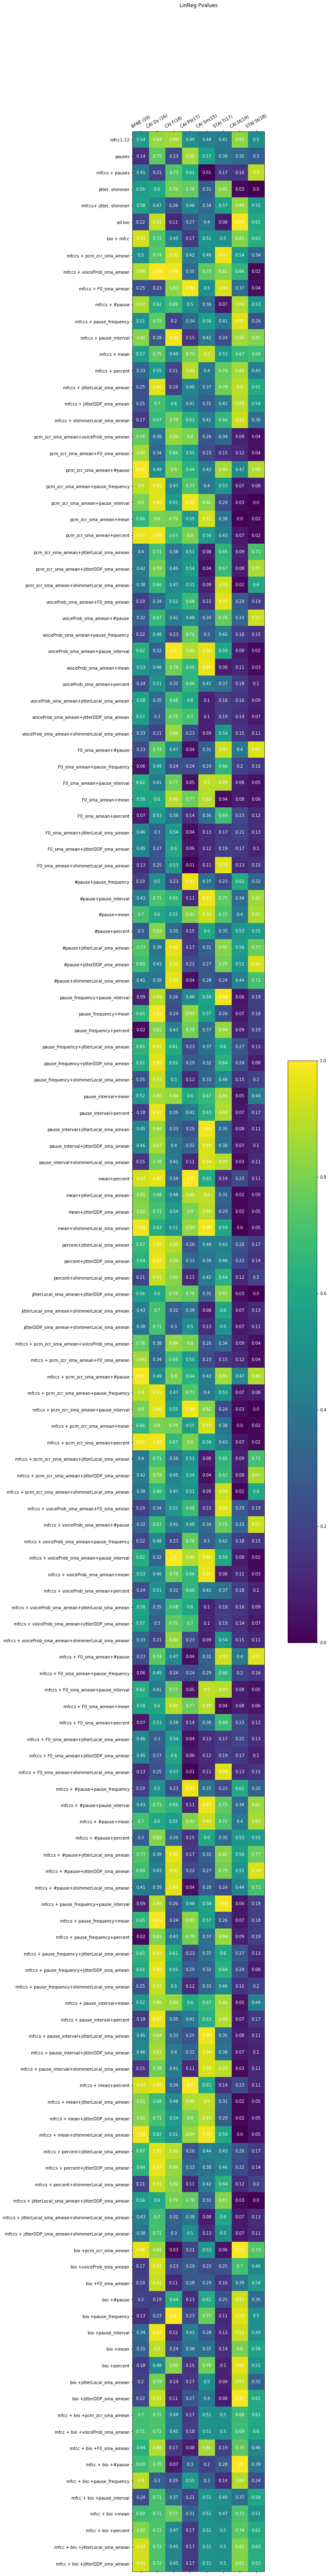

In [63]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(20,85))
p = ax2.matshow(pvalues)
fig.colorbar(p, ax=ax2, fraction=0.05, pad=0.04)
ax2.set_xticklabels(labels=[''] + short_y_col)  
ax2.set_yticklabels(labels=group_titles)
plt.yticks(np.arange(0, len(group_titles), 1.0))
for tick in ax2.get_xticklabels():
    tick.set_rotation(30)
    
for i in range(len(short_y_col)):
    for j in range(len(group_titles)):
        text = ax2.text(i, j, pvalues[j, i], ha="center", va="center", color="w")

plt.title('LinReg Pvalues')
fig.tight_layout()
plt.savefig(DATA_PATH + 'pvalues.png')
plt.show()

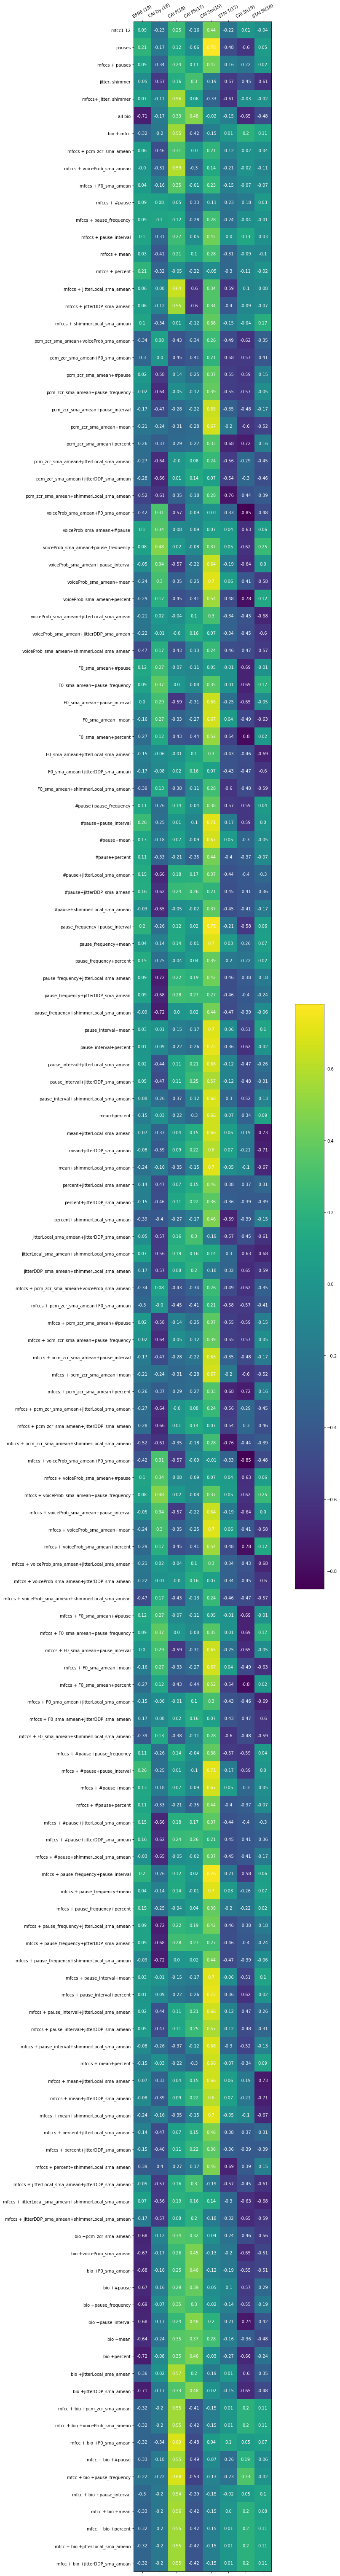

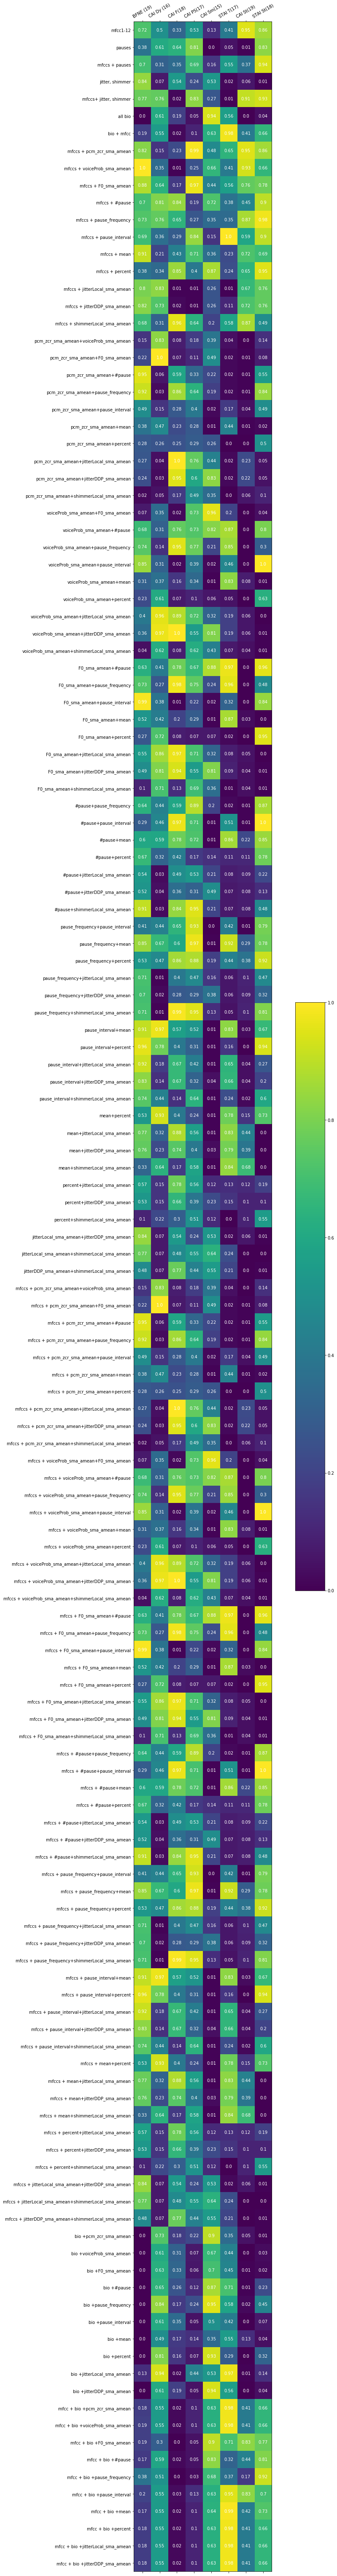

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def generate_graphs(c, p, titles, specifier):
    short_y_col = ["BFNE (19)", "CAI Dy (16)", "CAI F(18)", "CAI PS(17)", "CAI Sm(15)", "STAI T(17)", "CAI St(19)", "STAI St(18)"]
    correlations = np.matrix(c)
    pvalues = np.matrix(p)

    correlations = np.round(correlations, decimals=2)
    pvalues = np.round(pvalues, decimals=2)
    
    data = [correlations, pvalues]
    graph_titles = ["correlations_" + specifier + ".png", "pvalues_" + specifier + ".png"]
    
    for k in range(2):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,85))
        p = ax.matshow(data[k])
        fig.colorbar(p, ax=ax, fraction=0.05, pad=0.04)
        ax.set_xticklabels(labels=[''] + short_y_col)
        ax.set_yticklabels(labels=titles)
        plt.yticks(np.arange(0, len(titles), 1.0))
        for tick in ax.get_xticklabels():
            tick.set_rotation(30)  

        for i in range(len(short_y_col)):
            for j in range(len(titles)):
                text = ax.text(i, j, data[k][j, i], ha="center", va="center", color="w")

        fig.tight_layout()
        plt.savefig(DATA_PATH + graph_titles[k])
        

#slopes_3 = get_slopes(all_data, 3)
#c3, p3, titles3 = generate_combos(slopes_3)
#generate_graphs(c3, p3, titles3, '3')

slopes_3 = get_slopes(all_data, 5)
c3, p3, titles3 = generate_combos(slopes_3)
generate_graphs(c3, p3, titles3, '5')